In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Library.Integration import*
from Library.Root import*
from Library.Diff_eqn import*
import pandas as pd

In [2]:
#defining the function
def truncated_number(x, n):
    return int(x*10**n)/10**n

# Q.1 Solve exp(−x) − x = 0 using fixed-point method, accurate up to 4 places in decimal.

In [3]:
# Define the function
def root_f(x):
    return np.exp(-x) - x

In [4]:
R = RootFindings(root_f, 1, 2, 0.00001,100)
#find the interval of the root
R.bracket(5,1.5)

a= -0.5 ,b= 2 
Iterations: 6 



(-0.5, 2)

In [5]:

print("The root of the function upto 4 decimal place is: ", truncated_number(R.fixed_point((lambda x: np.exp(-x)),0.2), 4))

The root of the function upto 4 decimal place is:  0.5671


# Q.2 Integrate the function f(x) = $\sqrt{1 + x^4}$ over the interval [0, 1] 

In [6]:
# Define the function
def fun(x):
    return np.sqrt(1+x**4)

# <h2> Using Simpson’s rule 

In [7]:
K = NumericalIntegration(fun, 0, 1, 8)
s = K.simpson()
print("The integral of the function using Simpson's rule is upto 6 decimal places is:", truncated_number(s, 6))

The integral of the function using Simpson's rule is upto 6 decimal places is: 1.089429


# <h2> Using Gaussian quadrature

In [8]:
M = NumericalIntegration(fun, 0, 1, 5)
g = M.gaussian_quadrature()
print("The integral of the function using Gaussian Quadrature is upto 6 decimal places is:", truncated_number(g, 6))

The integral of the function using Gaussian Quadrature is upto 6 decimal places is: 1.089429


# Q.3 Solve y' = $\frac{5x^2 - y}{e^{x+y}}$, y(0) = 1 using RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01

In [9]:
#define the function
def diff_f(x, y):
    return (5*x**2 - y)/math.exp(x+y)

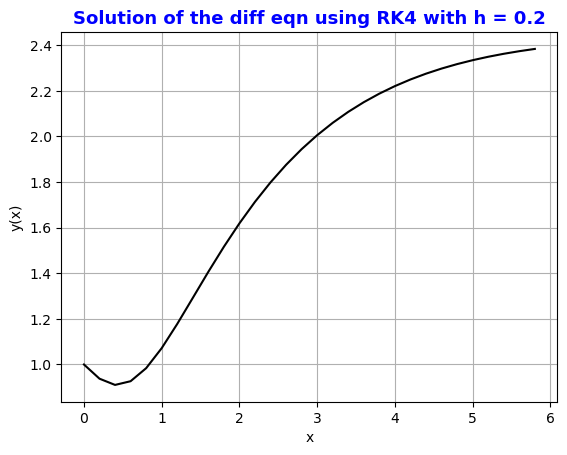

[0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2000000000000002, 1.4000000000000001, 1.6, 1.8, 2.0, 2.2, 2.4000000000000004, 2.6, 2.8000000000000003, 3.0, 3.2, 3.4000000000000004, 3.6, 3.8000000000000003, 4.0, 4.2, 4.4, 4.6000000000000005, 4.800000000000001, 5.0, 5.2, 5.4, 5.6000000000000005, 5.800000000000001]


In [10]:
D = DifferentialEquation1(diff_f, 0, 6, 1, 0.2)
y = D.runge_kutta4()
print(y[0])

In [11]:
print(y[1])

[1, 0.93779727329182, 0.9104446690637412, 0.9267111805650831, 0.9838122238669428, 1.0715857107318785, 1.1778273262796006, 1.291957348494306, 1.4063579243864295, 1.5162271432059788, 1.6188961773810309, 1.7131296645830512, 1.79858442514907, 1.8754390477572997, 1.9441565799629328, 2.005338610602514, 2.0596383274718795, 2.107710358628713, 2.1501830828225037, 2.187644454079249, 2.220635830373286, 2.249650448802069, 2.2751345156311813, 2.2974896906861697, 2.3170762399922062, 2.334216431220437, 2.349197928781337, 2.3622770553601047, 2.3736818524399905, 2.383614911111986]


# Q.4 Solve the heat equation $u_t = 4u_{xx}$, using Crank-Nicolson by choosing suitable $\alpha$, subjected to the boundary conditions u(0, t) = 0 = u(8, t) and $u(x, 0) = (4x − x^2)/2$

In [12]:
# Initial condition
def initial_condition(x):
    return  4*x - (x**2)/2

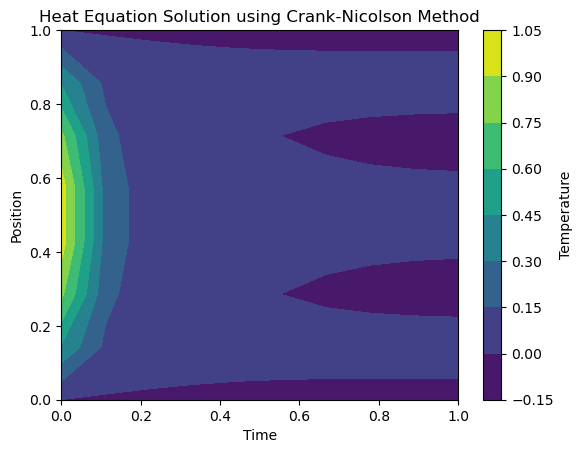

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def heat_eqn_crank_nicolson(L, N, T, M, alpha, gamma):
    # Discretization
    dx = L / (N - 1)
    dt = T / M
    m = alpha * gamma

    x_values = np.linspace(0, L, N)
    t_values = np.linspace(0, T, M)
    u = np.zeros((N, M))  # Initialize the u array

    # Apply initial condition
    for i in range(N):
        u[i, 0] = initial_condition(x_values[i])

    # Create identity matrix 'I' and tridiagonal matrix 'B'
    I = np.identity(N)
    B = np.zeros((N, N))
    for i in range(N):
        B[i, i] = 2
    for j in range(N - 1):
        B[j, j + 1] = -1
    for j in range(1, N):
        B[j, j - 1] = -1

    # Construct matrices 'm1' and 'm2' for the Crank-Nicolson method
    m1 = 2 * I - 4 * alpha * B
    m2 = np.linalg.inv(2 * I + 4 * alpha * B)

    l = [u[:, 0]]  # Store initial condition

    # Perform iterations to solve the linear system using Crank-Nicolson method
    for k in range(1, M):
        u[:, k] = np.linalg.solve(m1, m2 @ u[:, k-1])
        l.append(u[:, k])

    X, Y = np.meshgrid(t_values, x_values)
    Z = np.array(l).T  # Convert list of solutions to array for plotting

    return X, Y, Z

# Define initial condition function
def initial_condition(x):
    return np.sin(np.pi * x)

# Define parameters
L = 1
N = 8
T = 1
M = 10
alpha = 0.1
gamma = 4

# Call the function to obtain data for plotting
X, Y, Z = heat_eqn_crank_nicolson(L,N, T, M, alpha, gamma)

# Plotting
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Temperature')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Heat Equation Solution using Crank-Nicolson Method')
plt.show()


In [14]:
def heat_eqn_crank_nicolson(L, N, T, M, alpha, gamma):
    # Discretization
    dx = L / (N - 1)
    dt = T / M
    m = alpha*gamma

    x_values = np.linspace(0, L, N)
    t_values = np.linspace(0, T, M)
    u = np.zeros((N, M))  #initialise the u array

    # Apply initial condition
    for i in range(N):
        u[i, 0] = initial_condition(x_values[i])

    # Create identity matrix 'I' and tridiagonal matrix 'B'
    I = np.identity(N)
    B = np.zeros((N, N))
    for i in range(N):
        B[i, i] = 2
    for j in range(N - 1):
        B[j, j + 1] = -1
    for j in range(1, N):
        B[j, j - 1] = -1

    # Construct matrices 'm1' and 'm2' for the Crank-Nicolson method
    m1 = 2 * I - 4 * alpha * B
    m2 = np.linalg.inv(2 * I + 4 * alpha * B)
    print(m2)

    # Initialize vector 'm' with values and an empty list 'l' to store solutions
    m = np.array(u)
    print(m)
    l = []
    n = 0

    # Perform iterations to solve the linear system using Crank-Nicolson method
    while n < N:
        v = m1 @ m2 @ u
        l.append(v)
        n += 1
    X, Y = np.meshgrid(t_values, x_values)
    # Return the list of solutions
    return np.shape(l)
heat_eqn_crank_nicolson(1, 10, 1, 10, 0.1, 0.1)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(k[0], k[1], k[2], cmap='viridis')

[[3.64745084e-01 5.32155906e-02 7.76405004e-03 1.13275963e-03
  1.65267403e-04 2.41121891e-05 3.51792027e-06 5.13252805e-07
  7.48493675e-08 1.06927668e-08]
 [5.32155906e-02 3.72509134e-01 5.43483503e-02 7.92931744e-03
  1.15687182e-03 1.68785324e-04 2.46254419e-05 3.59276964e-06
  5.23945572e-07 7.48493675e-08]
 [7.76405004e-03 5.43483503e-02 3.72674402e-01 5.43724625e-02
  7.93283536e-03 1.15738508e-03 1.68860173e-04 2.46361347e-05
  3.59276964e-06 5.13252805e-07]
 [1.13275963e-03 7.92931744e-03 5.43724625e-02 3.72677920e-01
  5.43729757e-02 7.93291021e-03 1.15739577e-03 1.68860173e-04
  2.46254419e-05 3.51792027e-06]
 [1.65267403e-04 1.15687182e-03 7.93283536e-03 5.43729757e-02
  3.72677995e-01 5.43729864e-02 7.93291021e-03 1.15738508e-03
  1.68785324e-04 2.41121891e-05]
 [2.41121891e-05 1.68785324e-04 1.15738508e-03 7.93291021e-03
  5.43729864e-02 3.72677995e-01 5.43729757e-02 7.93283536e-03
  1.15687182e-03 1.65267403e-04]
 [3.51792027e-06 2.46254419e-05 1.68860173e-04 1.15739577e

(10, 10, 10)

[[2.15081964e-01 7.40163832e-02 2.54712815e-02 8.76528149e-03
  3.01588338e-03 1.03633949e-03 3.52219956e-04 1.08375371e-04]
 [7.40163832e-02 2.40553246e-01 8.27816647e-02 2.84871648e-02
  9.80162097e-03 3.36810333e-03 1.14471486e-03 3.52219956e-04]
 [2.54712815e-02 8.27816647e-02 2.43569129e-01 8.38180042e-02
  2.88393848e-02 9.90999634e-03 3.36810333e-03 1.03633949e-03]
 [8.76528149e-03 2.84871648e-02 8.38180042e-02 2.43921349e-01
  8.39263796e-02 2.88393848e-02 9.80162097e-03 3.01588338e-03]
 [3.01588338e-03 9.80162097e-03 2.88393848e-02 8.39263796e-02
  2.43921349e-01 8.38180042e-02 2.84871648e-02 8.76528149e-03]
 [1.03633949e-03 3.36810333e-03 9.90999634e-03 2.88393848e-02
  8.38180042e-02 2.43569129e-01 8.27816647e-02 2.54712815e-02]
 [3.52219956e-04 1.14471486e-03 3.36810333e-03 9.80162097e-03
  2.84871648e-02 8.27816647e-02 2.40553246e-01 7.40163832e-02]
 [1.08375371e-04 3.52219956e-04 1.03633949e-03 3.01588338e-03
  8.76528149e-03 2.54712815e-02 7.40163832e-02 2.15081964e-01]]

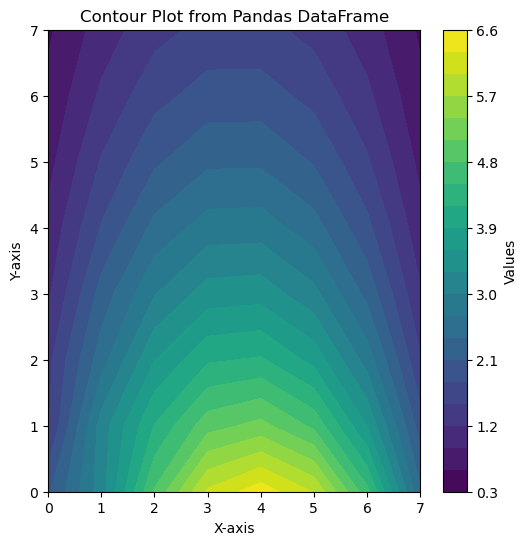

In [15]:
import numpy as np
import matplotlib.pyplot as plt
# Function to solve a tridiagonal system of linear equations using Crank-Nicolson method
def cnicolson(n, alpha):
    # Initialize vector 'v' with values
    v = np.zeros(n)
    for i in range(len(v)):
        v[i] = 4 * i - ((i ** 2) / 2.0)

    # Create identity matrix 'I' and tridiagonal matrix 'B'
    I = np.identity(n)
    B = np.zeros((n, n))
    for i in range(n):
        B[i, i] = 2
    for j in range(n - 1):
        B[j, j + 1] = -1
    for j in range(1, n):
        B[j, j - 1] = -1

    # Construct matrices 'm1' and 'm2' for the Crank-Nicolson method
    m1 = 2 * I - 4 * alpha * B
    m2 = np.linalg.inv(2 * I + 4 * alpha * B)
    print(m2)

    # Initialize vector 'm' with values and an empty list 'l' to store solutions
    m = np.array(v)
    l = []
    n = 0

    # Perform iterations to solve the linear system using Crank-Nicolson method
    while n < 8:
        v = m1 @ m2 @ v
        l.append(v)
        n += 1

    # Return the list of solutions
    return l

# Call the cnicolson function with parameters and store the results
stored = cnicolson(8, 0.4)

# Create a Pandas DataFrame from the stored solutions
df = pd.DataFrame(stored)

# Print the Pandas DataFrame to the console
print("Solution as Pandas DataFrame:")
print(df)

# Plot a contour plot using the Pandas DataFrame
plt.figure(figsize=(6, 6))
contour_plot = plt.contourf(df.columns, df.index, df.values, cmap='viridis', levels=20)
plt.colorbar(contour_plot, label='Values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Contour Plot from Pandas DataFrame')

# Show the plot
plt.show()


[[0.  0.  0.  ... 0.  0.  0. ]
 [0.5 1.  0.5 ... 0.  0.  0. ]
 [0.  0.5 1.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.  0.5 0. ]
 [0.  0.  0.  ... 0.5 1.  0.5]
 [0.  0.  0.  ... 0.  0.  0. ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.31996735 0.31726256 0.31534998 ... 0.15889494 0.15881368 0.15873247]
 [0.63340475 0.63023589 0.62733888 ... 0.31762732 0.3174649  0.31730258]
 ...
 [0.63340475 0.63023589 0.62733888 ... 0.31762732 0.3174649  0.31730258]
 [0.31996735 0.31726256 0.31534998 ... 0.15889494 0.15881368 0.15873247]
 [0.         0.         0.         ... 0.         0.         0.        ]]


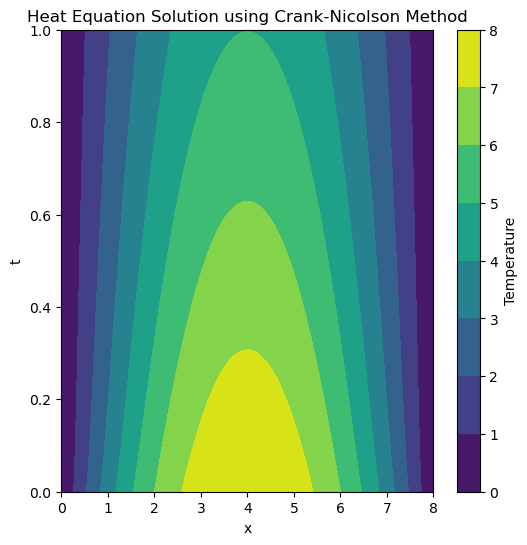

In [16]:
def solve_heat_equation_crank_nicolson(L, N, T, M, alpha=0.5):
    """
    Solves the heat equation ut = 4uxx using the Crank-Nicolson method.

    Parameters:
        L (float): Length of the rod.-
        N (int): Number of spatial points.
        T (float): Total time.
        M (int): Number of time steps.
        alpha (float): Stability parameter (default is 0.5).

    Returns:
        X (ndarray): Meshgrid for spatial points.
        T (ndarray): Meshgrid for time points.
        u (ndarray): Solution of the heat equation.
    """

    # Discretization
    dx = L / (N - 1)
    dt = T / M

    x_values = np.linspace(0, L, N)
    t_values = np.linspace(0, T, M)

    # Initial condition
    def initial_condition(x):
        return 4 * x - x**2 / 2

    u = np.zeros((N, M))

    # Apply initial condition
    for i in range(N):
        u[i, 0] = initial_condition(x_values[i])

    # Crank-Nicolson scheme
    A = np.zeros((N, N))
    B = np.zeros((N, N))

    for i in range(1, N - 1):
        A[i, i - 1] = -alpha
        A[i, i] = 2 + 2 * alpha
        A[i, i + 1] = -alpha
    # print(A)
    for i in range(1, N - 1):
        B[i, i - 1] = alpha
        B[i, i] = 2 - 2 * alpha
        B[i, i + 1] = alpha
    print(B)
    for j in range(1, M):
        b = np.dot(B, u[:, j - 1])
        u[1:N-1, j] = np.linalg.solve(A[1:N-1, 1:N-1], b[1:N-1])

    # Create meshgrid for plotting
    X, T = np.meshgrid(x_values, t_values)

    return X, T, u

# Parameters
L = 8  # Length of the rod
N = 100  # Number of spatial points
T = 1  # Total time
M = 1000  # Number of time steps

# Solve heat equation using Crank-Nicolson method
X, T, u = solve_heat_equation_crank_nicolson(L, N, T, M)
print(u)
# Plotting
plt.figure(figsize=(6, 6))
plt.contourf(X, T, u.T, cmap='viridis')
plt.colorbar(label='Temperature')
plt.title('Heat Equation Solution using Crank-Nicolson Method')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

# Q.5 Solve Possion's equation $\nabla^2 u = xe^y$ , subjected to the boundary conditions $u(0, y) = 0, u(2, y)  = 2e^y$ and $u(x, 0) = x, u(x, 1) = xe$

In [17]:
# Define grid size
N = 26
x = np.linspace(0, 2, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)
hx = 2/(N+1)
hy = 1/(N+1)
# Initialize solution matrix
u = np.zeros((N, N))

# Boundary conditions
u[0, :] = 0
u[-1, :] = 2 * np.exp(y)
u[:, 0] = x
u[:, -1] = x * np.exp(1)

# Define tolerance and maximum number of iterations
tolerance = 1e-6
max_iter = 10000
# h = N/()
# Define source term
f = -X * np.exp(Y) 
# Gauss-Seidel iterative method
for _ in range(max_iter):
    u_old = u.copy()
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            u[i, j] = 0.25 * (u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1])
            u[i,j] += 0.25 * hx*hy * f[i,j]
    # print(u)
    if np.max(np.abs(u - u_old)) < tolerance:
        break
# print(u)
# Display the solution in a table
# print("Solution (u):")
# print(u)

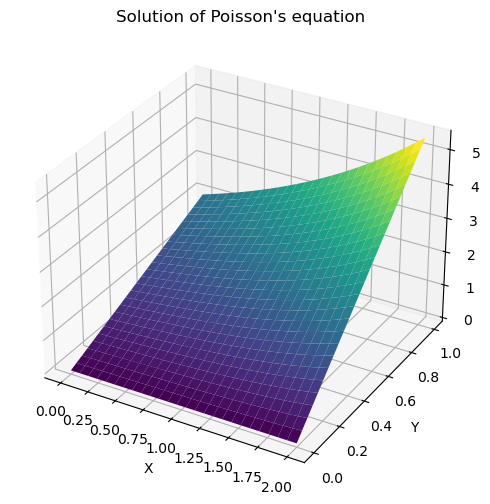

In [18]:
# Display the solution in a 3D plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, u, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Solution (u)')
ax.set_title('Solution of Poisson\'s equation')
plt.show()


0.03076923076923077
0.015384615384615385
     0             1             2             3             4             5   \
0   0.0  3.076923e-02  6.153846e-02  9.230769e-02  1.230769e-01  1.538462e-01   
1   0.0  3.076916e-03  6.156752e-03  9.236591e-03  1.231643e-02  1.539627e-02   
2   0.0  3.076776e-04  6.159523e-04  9.242278e-04  1.232503e-03  1.540779e-03   
3   0.0  3.074676e-05  6.160301e-05  9.245944e-05  1.233159e-04  1.541723e-04   
4   0.0  3.046669e-06  6.134744e-06  9.222870e-06  1.231099e-05  1.539910e-05   
..  ...           ...           ...           ...           ...           ...   
61  0.0 -4.736965e-07 -4.815379e-07 -4.890040e-07 -4.965853e-07 -5.042841e-07   
62  0.0 -4.814762e-07 -4.894464e-07 -4.970351e-07 -5.047409e-07 -5.125662e-07   
63  0.0 -4.892559e-07 -4.973549e-07 -5.050662e-07 -5.128965e-07 -5.208482e-07   
64  0.0  8.363447e-03  1.673530e-02  2.510716e-02  3.347903e-02  4.185089e-02   
65  0.0  8.363944e-02  1.672789e-01  2.509183e-01  3.345578e-01  4.1

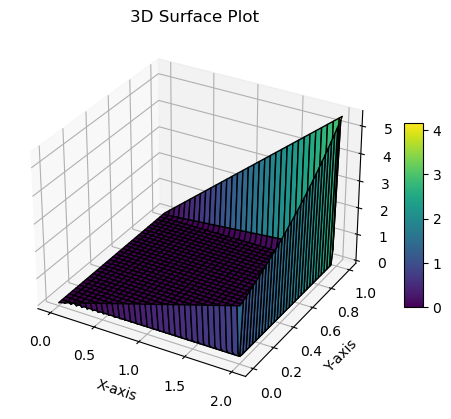

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a 1D array 'x' with 36 points from 0 to 2 and the step size 'dx'
# Generate a 1D array 'y' with 36 points from 0 to 1 and the step size 'dy'
x, dx = np.linspace(0, 2, 66, retstep=True)
y, dy = np.linspace(0, 1, 66, retstep=True)
print(dx)
print(dy)
# Create 2D grids 'X' and 'Y' using meshgrid from 'x' and 'y'
X, Y = np.meshgrid(x, y)

# Initialize a 2D array 'u' with zeros and shape (36, 36)
u = np.zeros((66, 66))

# Set boundary conditions for the top and sides of the grid
for i in range(len(x)):
    u[i, -1] = 2 * np.exp(y[i])

for i in range(len(x)):
    u[0, i] = x[i]
    u[-1, i] = x[i] * np.exp(1)

# Initialize a variable 'n' to zero for the while loop
n = 0

# Iterative loop to solve the differential equation (finite difference method)
while n <= 1000:
    for i in range(1, 65):
        for j in range(1, 65):
            # Update the value of 'u' using finite difference method
            u[i, j] = ((1 / ((dx ** 2 + dy ** 2) * 2)) * ((u[i + 1, j] + u[i - 1, j]) * dy ** 2) +
                       ((u[i, j + 1] + u[i, j - 1]) * dx ** 2) - (dx ** 2 * dy ** 2 * x[i] * np.exp(y[j])))
            n += 1

# Create a DataFrame 'df' from the array 'u'
df = pd.DataFrame(u)
print(df)

# Create a 3D plot using matplotlib
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface using the values from the DataFrame
surf = ax.plot_surface(X, Y, df.values, cmap='viridis', edgecolor='k')

# Set labels for the axes and title for the plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Surface Plot')

# Add a colorbar to the plot
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Display the plot
plt.show()

Solution as Pandas DataFrame:
          0         1         2         3         4         5         6  \
0  2.048068  3.156220  4.834646  6.056380  6.473589  5.982783  4.595456   
1  1.463745  3.137001  4.215960  4.978253  5.197413  4.729367  3.591073   
2  1.416610  2.564791  3.592007  4.155948  4.235142  3.798702  2.869178   
3  1.144716  2.217994  2.978739  3.436174  3.478639  3.091109  2.312172   
4  0.979325  1.823350  2.486603  2.837997  2.856641  2.527782  1.886173   
5  0.803931  1.523920  2.050392  2.343460  2.351107  2.074339  1.543518   
6  0.669455  1.254758  1.697125  1.931311  1.935732  1.705349  1.267782   
7  0.551112  1.038447  1.398330  1.592899  1.594218  1.403448  1.042486   

          7  
0  2.452448  
1  1.952982  
2  1.537081  
3  1.239550  
4  1.005748  
5  0.823194  
6  0.675048  
7  0.555071  


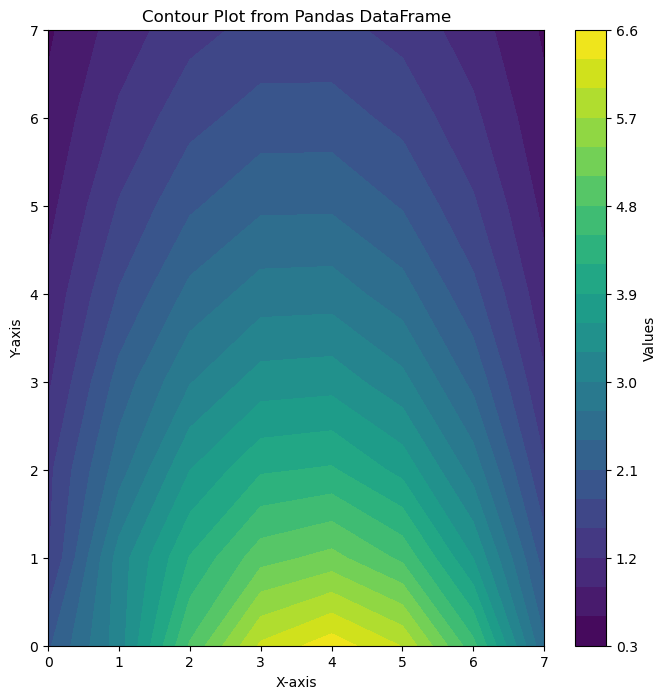

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to solve a tridiagonal system of linear equations using Crank-Nicolson method
def cnicolson(n, alpha,gamma):
    # Initialize vector 'v' with values
    m = alpha*gamma
    v = np.zeros(n)
    for i in range(len(v)):
        v[i] = 4 * i - ((i ** 2) / 2.0)
    
    # Create identity matrix 'I' and tridiagonal matrix 'B'
    I = np.identity(n)
    B = np.zeros((n, n))
    for i in range(n):
        B[i, i] = 2
    for j in range(n - 1):
        B[j, j + 1] = -1
    for j in range(1, n):
        B[j, j - 1] = -1

    # Construct matrices 'm1' and 'm2' for the Crank-Nicolson method
    m1 = 2 * I - 4 * alpha * B
    m2 = np.linalg.inv(2 * I + 4 * alpha * B)

    # Initialize vector 'm' with values and an empty list 'l' to store solutions
    m = np.array(v)
    l = []
    n = 0

    # Perform iterations to solve the linear system using Crank-Nicolson method
    while n < 8:
        v = m1 @ m2 @ v
        l.append(v)
        n += 1

    # Return the list of solutions
    return l

# Call the cnicolson function with parameters and store the results
stored = cnicolson(8, 0.4,1)

# Create a Pandas DataFrame from the stored solutions
df = pd.DataFrame(stored)

# Print the Pandas DataFrame to the console
print("Solution as Pandas DataFrame:")
print(df)

# Plot a contour plot using the Pandas DataFrame
plt.figure(figsize=(8, 8))
contour_plot = plt.contourf(df.columns, df.index, df.values, cmap='viridis', levels=20)
plt.colorbar(contour_plot, label='Values')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Contour Plot from Pandas DataFrame')

# Show the plot
plt.show()
